# Minimal example with TensorFlow 2.0
In this notebook we will recreate our machine learning algorithm using TF 2.0.

## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print(tf.__version__)

2.12.0


## Data generation

In [3]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


## Solving with TensorFlow

In [4]:
training_data = np.load('TF_intro.npz')

In [5]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([# functions that specifies how the model will be laid down ('stacked layers')
                            tf.keras.layers.Dense(output_size, # functions that takes the inputs provided into the model and calculates the dot product of the inputs and weights and add bias, analogus to y = m*x + b where we multiply m and x using dot product
                                                        kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
														bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1))
                            ]) 

model.compile(optimizer='sgd', loss='mean_squared_error') # configures the model for training, SGD stands for stochastic gradient descent and mean_squared error is L2-norm loss function

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2) # fit the model, where epochs = number of iterations

Epoch 1/100
32/32 - 1s - loss: 29.5438 - 949ms/epoch - 30ms/step
Epoch 2/100
32/32 - 0s - loss: 4.8396 - 65ms/epoch - 2ms/step
Epoch 3/100
32/32 - 0s - loss: 1.5740 - 67ms/epoch - 2ms/step
Epoch 4/100
32/32 - 0s - loss: 0.6869 - 72ms/epoch - 2ms/step
Epoch 5/100
32/32 - 0s - loss: 0.4336 - 68ms/epoch - 2ms/step
Epoch 6/100
32/32 - 0s - loss: 0.3701 - 72ms/epoch - 2ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3559 - 58ms/epoch - 2ms/step
Epoch 8/100
32/32 - 0s - loss: 0.3476 - 63ms/epoch - 2ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3438 - 63ms/epoch - 2ms/step
Epoch 10/100
32/32 - 0s - loss: 0.3445 - 63ms/epoch - 2ms/step
Epoch 11/100
32/32 - 0s - loss: 0.3424 - 66ms/epoch - 2ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3459 - 59ms/epoch - 2ms/step
Epoch 13/100
32/32 - 0s - loss: 0.3444 - 67ms/epoch - 2ms/step
Epoch 14/100
32/32 - 0s - loss: 0.3440 - 55ms/epoch - 2ms/step
Epoch 15/100
32/32 - 0s - loss: 0.3391 - 58ms/epoch - 2ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3551 - 61ms/epoch - 2ms/ste

## Extract the weights and bias

In [6]:
model.layers[0].get_weights() # Extracting the weights and bias

[array([[ 2.0453994],
        [-2.9883964]], dtype=float32),
 array([5.0274286], dtype=float32)]

In [7]:
# Assigning weights

weights = model.layers[0].get_weights()[0]

# Assigning bias

bias = model.layers[0].get_weights()[1]

## Extract outputs (make predictions)

In [8]:
prediction = model.predict_on_batch(training_data['inputs']) # Calculates the outputs with the given inputs (on the model earlier that compares with the loss function)
# Each of the values in the array corresponds to the targets to evaluate the loss function (after 100 epochs)

print(prediction[:10].round(2))

[[ 19.45]
 [  3.9 ]
 [ -1.32]
 [ -6.29]
 [  6.05]
 [-21.22]
 [ 18.44]
 [ 24.56]
 [ 15.51]
 [-24.1 ]]


In [9]:
# If compare the predicted outputs to the actual targets, here is some of the ways we can do

print(training_data['targets'][:10].round(2))

[[ 18.26]
 [  3.16]
 [ -1.39]
 [ -5.92]
 [  6.34]
 [-21.53]
 [ 18.53]
 [ 23.51]
 [ 15.71]
 [-24.25]]


## Plotting the data

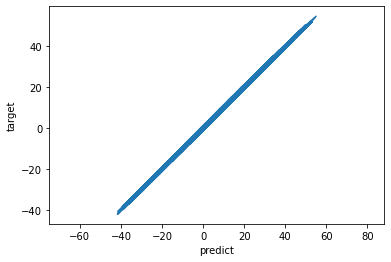

In [10]:
# The line should be as close to 45 degrees possible

plt.plot(np.squeeze(prediction), np.squeeze(training_data['targets']))
plt.xlabel('predict')
plt.ylabel('target')
plt.axis('equal')
plt.show()

# 1. Change the number of observations to 100,000 and see what happens.

## Data generation

In [2]:
observations = 100000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


## Solving with TensorFlow

In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([# functions that specifies how the model will be laid down ('stacked layers')
                            tf.keras.layers.Dense(output_size, # functions that takes the inputs provided into the model and calculates the dot product of the inputs and weights and add bias, analogus to y = m*x + b where we multiply m and x using dot product
                                                        kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
														bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1))
                            ]) 

model.compile(optimizer='sgd', loss='mean_squared_error') # configures the model for training, SGD stands for stochastic gradient descent and mean_squared error is L2-norm loss function

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2) # fit the model, where epochs = number of iterations

Epoch 1/100
3125/3125 - 6s - loss: 0.7159 - 6s/epoch - 2ms/step
Epoch 2/100
3125/3125 - 5s - loss: 0.3441 - 5s/epoch - 2ms/step
Epoch 3/100
3125/3125 - 5s - loss: 0.3436 - 5s/epoch - 2ms/step
Epoch 4/100
3125/3125 - 5s - loss: 0.3442 - 5s/epoch - 1ms/step
Epoch 5/100
3125/3125 - 5s - loss: 0.3437 - 5s/epoch - 2ms/step
Epoch 6/100
3125/3125 - 5s - loss: 0.3436 - 5s/epoch - 2ms/step
Epoch 7/100
3125/3125 - 5s - loss: 0.3439 - 5s/epoch - 2ms/step
Epoch 8/100
3125/3125 - 5s - loss: 0.3437 - 5s/epoch - 1ms/step
Epoch 9/100
3125/3125 - 5s - loss: 0.3438 - 5s/epoch - 2ms/step
Epoch 10/100
3125/3125 - 5s - loss: 0.3443 - 5s/epoch - 2ms/step
Epoch 11/100
3125/3125 - 4s - loss: 0.3435 - 4s/epoch - 1ms/step
Epoch 12/100
3125/3125 - 4s - loss: 0.3438 - 4s/epoch - 1ms/step
Epoch 13/100
3125/3125 - 5s - loss: 0.3430 - 5s/epoch - 2ms/step
Epoch 14/100
3125/3125 - 5s - loss: 0.3426 - 5s/epoch - 1ms/step
Epoch 15/100
3125/3125 - 5s - loss: 0.3438 - 5s/epoch - 1ms/step
Epoch 16/100
3125/3125 - 5s - loss

## Extract the weights and bias

In [5]:
model.layers[0].get_weights() # Extracting the weights and bias

# the linear model equation: 2*xs - 3*zs + 5 + noise
# Both weights and bias converged

[array([[ 2.0061429],
        [-3.0009224]], dtype=float32),
 array([4.986544], dtype=float32)]

In [6]:
# Assigning weights

weights = model.layers[0].get_weights()[0]

# Assigning bias

bias = model.layers[0].get_weights()[1]

## Extract outputs (make predictions)

In [7]:
prediction = model.predict_on_batch(training_data['inputs']) # Calculates the outputs with the given inputs (on the model earlier that compares with the loss function)
# Each of the values in the array corresponds to the targets to evaluate the loss function (after 100 epochs)

print(prediction[:10].round(2))

[[12.26]
 [34.24]
 [11.26]
 [-3.05]
 [33.71]
 [26.75]
 [ 5.89]
 [-3.04]
 [ 9.01]
 [-7.71]]


In [8]:
# If compare the predicted outputs to the actual targets, here is some of the ways we can do

print(training_data['targets'][:10].round(2))

[[13.23]
 [33.59]
 [10.35]
 [-3.93]
 [33.19]
 [26.19]
 [ 5.81]
 [-3.03]
 [ 9.38]
 [-8.27]]


## Plotting the data

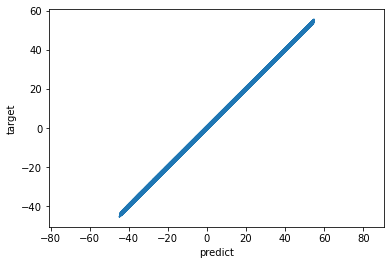

In [9]:
# The line should be as close to 45 degrees possible

plt.plot(np.squeeze(prediction), np.squeeze(training_data['targets']))
plt.xlabel('predict')
plt.ylabel('target')
plt.axis('equal') # Set equal scaling for both axis
plt.show()

# 2. Play around with the learning rate. Values like 0.0001, 0.001, 0.1, 1 are all interesting to observe.

## Data generation

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


## Solving with TensorFlow

In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([# functions that specifies how the model will be laid down ('stacked layers')
                            tf.keras.layers.Dense(output_size, # functions that takes the inputs provided into the model and calculates the dot product of the inputs and weights and add bias, analogus to y = m*x + b where we multiply m and x using dot product
                                                        kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
														bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1))
                            ]) 

# We can also define a custom optimizer, where we can specify the learning rate
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error') # configures the model for training, SGD stands for stochastic gradient descent and mean_squared error is L2-norm loss function

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2) # fit the model, where epochs = number of iterations

Epoch 1/100
32/32 - 1s - loss: inf - 850ms/epoch - 27ms/step
Epoch 2/100
32/32 - 0s - loss: nan - 55ms/epoch - 2ms/step
Epoch 3/100
32/32 - 0s - loss: nan - 58ms/epoch - 2ms/step
Epoch 4/100
32/32 - 0s - loss: nan - 85ms/epoch - 3ms/step
Epoch 5/100
32/32 - 0s - loss: nan - 82ms/epoch - 3ms/step
Epoch 6/100
32/32 - 0s - loss: nan - 97ms/epoch - 3ms/step
Epoch 7/100
32/32 - 0s - loss: nan - 86ms/epoch - 3ms/step
Epoch 8/100
32/32 - 0s - loss: nan - 90ms/epoch - 3ms/step
Epoch 9/100
32/32 - 0s - loss: nan - 91ms/epoch - 3ms/step
Epoch 10/100
32/32 - 0s - loss: nan - 90ms/epoch - 3ms/step
Epoch 11/100
32/32 - 0s - loss: nan - 93ms/epoch - 3ms/step
Epoch 12/100
32/32 - 0s - loss: nan - 83ms/epoch - 3ms/step
Epoch 13/100
32/32 - 0s - loss: nan - 80ms/epoch - 3ms/step
Epoch 14/100
32/32 - 0s - loss: nan - 82ms/epoch - 3ms/step
Epoch 15/100
32/32 - 0s - loss: nan - 89ms/epoch - 3ms/step
Epoch 16/100
32/32 - 0s - loss: nan - 90ms/epoch - 3ms/step
Epoch 17/100
32/32 - 0s - loss: nan - 88ms/epoc

## Extract the weights and bias

In [5]:
model.layers[0].get_weights() # Extracting the weights and bias

[array([[nan],
        [nan]], dtype=float32),
 array([nan], dtype=float32)]

In [6]:
# Assigning weights

weights = model.layers[0].get_weights()[0]

# Assigning bias

bias = model.layers[0].get_weights()[1]

## Extract outputs (make predictions)

In [7]:
prediction = model.predict_on_batch(training_data['inputs']) # Calculates the outputs with the given inputs (on the model earlier that compares with the loss function)
# Each of the values in the array corresponds to the targets to evaluate the loss function (after 100 epochs)

print(prediction[:10].round(2))

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [8]:
# If compare the predicted outputs to the actual targets, here is some of the ways we can do

print(training_data['targets'][:10].round(2))

[[-34.88]
 [ -5.79]
 [ -2.24]
 [-30.36]
 [ 15.43]
 [  7.63]
 [ -3.56]
 [  2.1 ]
 [  7.41]
 [ -1.75]]


## Plotting the data

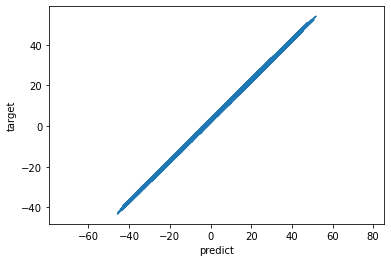

In [10]:
# The line should be as close to 45 degrees possible
# learning rate 0.0001

plt.plot(np.squeeze(prediction), np.squeeze(training_data['targets']))
plt.xlabel('predict')
plt.ylabel('target')
plt.axis('equal')  # Set equal scaling for both axes

plt.show()

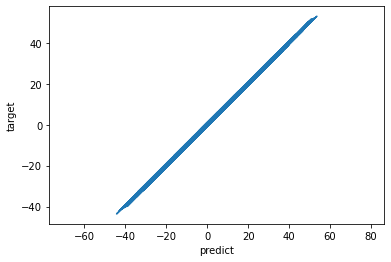

In [9]:
# The line should be as close to 45 degrees possible
# learning rate 0.001

plt.plot(np.squeeze(prediction), np.squeeze(training_data['targets']))
plt.xlabel('predict')
plt.ylabel('target')
plt.axis('equal')  # Set equal scaling for both axes

plt.show()

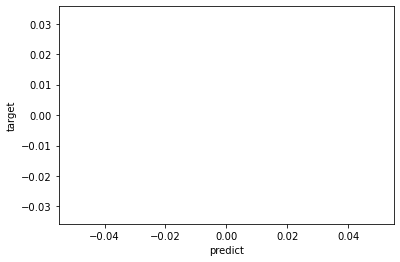

In [9]:
# The line should be as close to 45 degrees possible
# learning rate 0.1

plt.plot(np.squeeze(prediction), np.squeeze(training_data['targets']))
plt.xlabel('predict')
plt.ylabel('target')
plt.axis('equal')  # Set equal scaling for both axes

plt.show()

# 3. Change the loss function. An alternative loss for regressions is the Huber loss.

In [6]:
# The Huber loss is more appropriate than the L2-norm when we have outliers, as it is less sensitive to them (in our example we don't have outliers, but you will surely stumble upon a dataset with outliers in the future). The L2-norm loss puts all differences *to the square*, so outliers have a lot of influence on the outcome. 
# The proper syntax of the Huber loss is 'huber_loss'

## Data generation

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


## Solving with TensorFlow

In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([# functions that specifies how the model will be laid down ('stacked layers')
                            tf.keras.layers.Dense(output_size, # functions that takes the inputs provided into the model and calculates the dot product of the inputs and weights and add bias, analogus to y = m*x + b where we multiply m and x using dot product
                                                        kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
														bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1))
                            ]) 

# We can also define a custom optimizer, where we can specify the learning rate
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='huber_loss') # configures the model for training, SGD stands for stochastic gradient descent with this time, we replace mean_squred_loss to huber_loss

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2) # fit the model, where epochs = number of iterations

Epoch 1/100
32/32 - 1s - loss: 11.5750 - 963ms/epoch - 30ms/step
Epoch 2/100
32/32 - 0s - loss: 4.3432 - 80ms/epoch - 2ms/step
Epoch 3/100
32/32 - 0s - loss: 3.4668 - 74ms/epoch - 2ms/step
Epoch 4/100
32/32 - 0s - loss: 2.8138 - 67ms/epoch - 2ms/step
Epoch 5/100
32/32 - 0s - loss: 2.2227 - 68ms/epoch - 2ms/step
Epoch 6/100
32/32 - 0s - loss: 1.6405 - 70ms/epoch - 2ms/step
Epoch 7/100
32/32 - 0s - loss: 1.0858 - 69ms/epoch - 2ms/step
Epoch 8/100
32/32 - 0s - loss: 0.6191 - 73ms/epoch - 2ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3513 - 67ms/epoch - 2ms/step
Epoch 10/100
32/32 - 0s - loss: 0.2348 - 78ms/epoch - 2ms/step
Epoch 11/100
32/32 - 0s - loss: 0.1931 - 68ms/epoch - 2ms/step
Epoch 12/100
32/32 - 0s - loss: 0.1805 - 71ms/epoch - 2ms/step
Epoch 13/100
32/32 - 0s - loss: 0.1776 - 67ms/epoch - 2ms/step
Epoch 14/100
32/32 - 0s - loss: 0.1801 - 82ms/epoch - 3ms/step
Epoch 15/100
32/32 - 0s - loss: 0.1727 - 99ms/epoch - 3ms/step
Epoch 16/100
32/32 - 0s - loss: 0.1755 - 65ms/epoch - 2ms/ste

## Extract the weights and bias

In [5]:
model.layers[0].get_weights() # Extracting the weights and bias

[array([[ 2.0556152],
        [-3.026592 ]], dtype=float32),
 array([4.9866123], dtype=float32)]

In [6]:
# Assigning weights

weights = model.layers[0].get_weights()[0]

# Assigning bias

bias = model.layers[0].get_weights()[1]

## Extract outputs (make predictions)

In [7]:
prediction = model.predict_on_batch(training_data['inputs']) # Calculates the outputs with the given inputs (on the model earlier that compares with the loss function)
# Each of the values in the array corresponds to the targets to evaluate the loss function (after 100 epochs)

print(prediction[:10].round(2))

[[  2.35]
 [ 30.64]
 [  8.07]
 [  5.48]
 [  0.37]
 [ -0.69]
 [  6.25]
 [-17.17]
 [ 40.7 ]
 [  6.05]]


In [9]:
# If compare the predicted outputs to the actual targets, here is some of the ways we can do

print(training_data['targets'][:10].round(2))

[[  2.61]
 [ 31.19]
 [  7.64]
 [  5.27]
 [  1.3 ]
 [ -1.38]
 [  6.8 ]
 [-16.96]
 [ 40.85]
 [  6.67]]


## Plotting the data

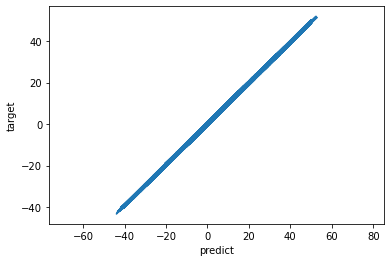

In [11]:
# The line should be as close to 45 degrees possible

plt.plot(np.squeeze(prediction), np.squeeze(training_data['targets']))
plt.xlabel('predict')
plt.ylabel('target')
plt.axis('equal')
plt.show()